## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

class is an additional row for each row of data represented by 0 1 or 2

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# additional modules
import seaborn as sns
import math
import random
import statistics
# for checking answer purposes
from sklearn import metrics

# load data
wine=datasets.load_wine()
print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values # 178 by 4
y = wine.target # 178 by 1

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

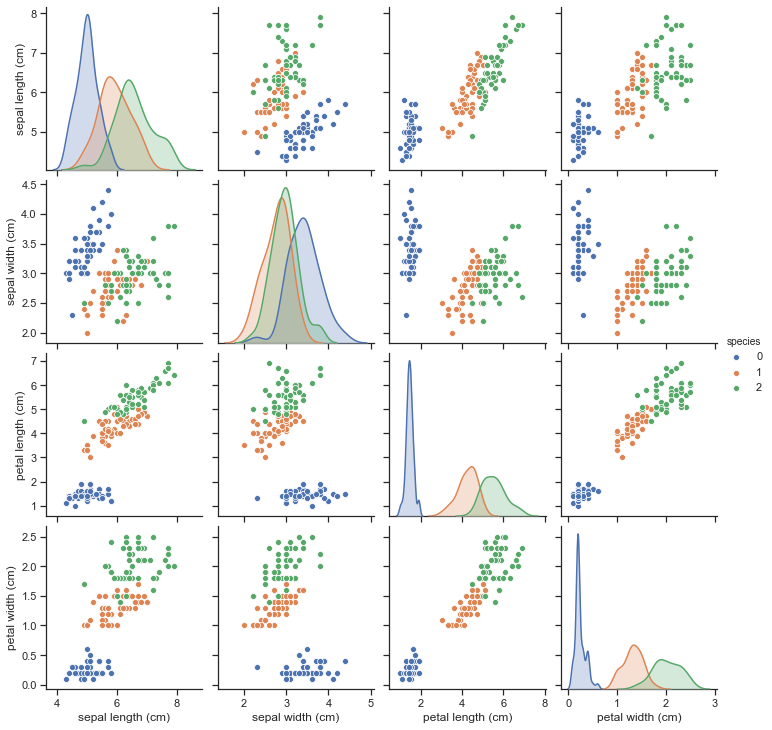

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
# define plotting function
def myplotGrid(X, y):
    df = pd.DataFrame(data = X, columns = selected_features)
    df['target'] = wine.target
    # https://seaborn.pydata.org/generated/seaborn.kdeplot.html
    g = sns.PairGrid(data = df, hue='target', palette="muted")
    g.map_diag(sns.kdeplot)
    g.map_offdiag(sns.scatterplot)
    g.add_legend()

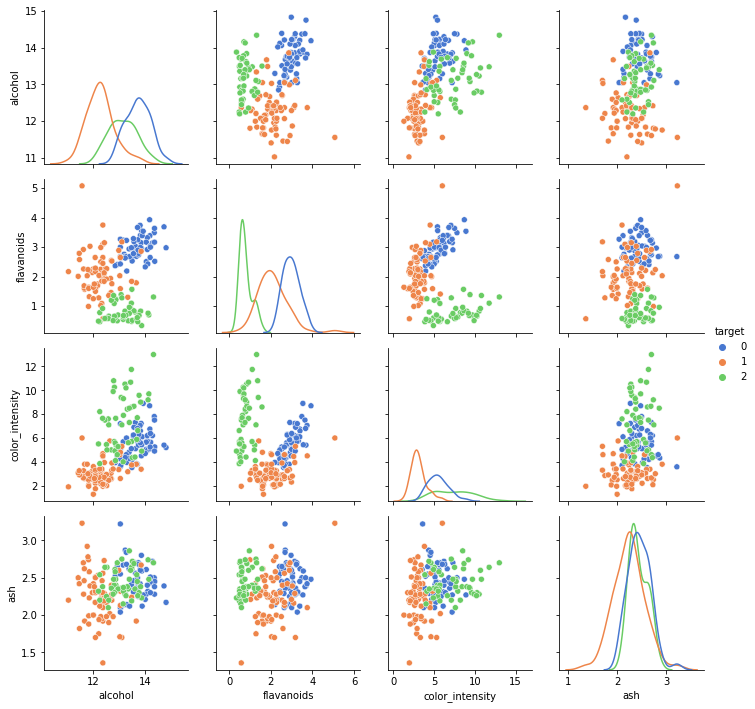

In [3]:
# run the plotting function
myplotGrid(X, y)

In [4]:
df_wine[selected_features].corr()

,alcohol,flavanoids,color_intensity,ash
alcohol,1.000000,0.236815,0.546364,0.211545
flavanoids,0.236815,1.000000,-0.172379,0.115077
color_intensity,0.546364,-0.172379,1.000000,0.258887
ash,0.211545,0.115077,0.258887,1.000000


### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

In [5]:
# noise code
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.6,X.shape)

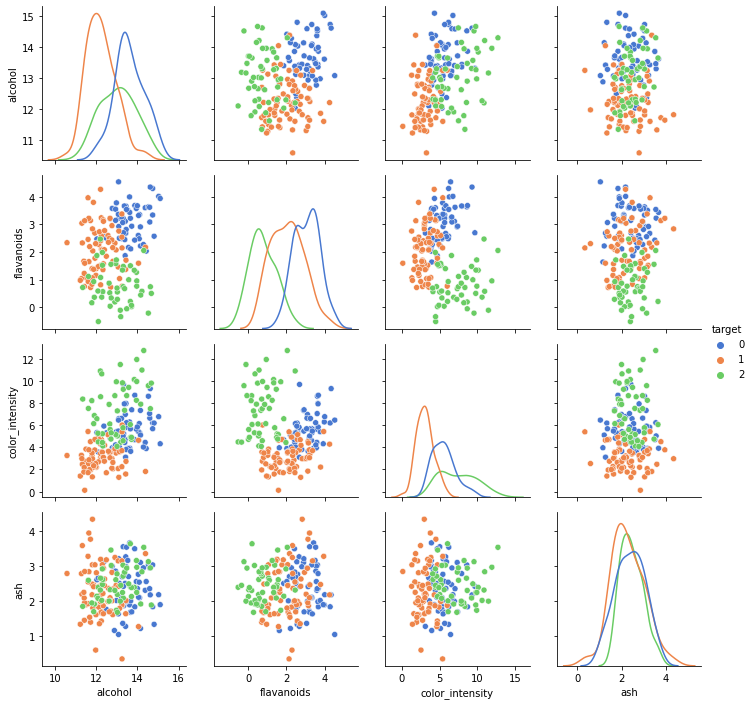

In [6]:
myplotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer: 

Flavanoids and alcohol will be chosen.
This is because when comparing the grid plots with all other plots, we can see that the plot for classifying flavanoids and alcohol has the least overlaps between classes. With less data of different classes overlapping, we are more likely to get a more accurate result when classifying them.
Flavanoids and color_intensity may also be used in some cases as it can be seen that they have a much lesser overlapping between classes 1 and 2 as compared to flavanoids and alcohol, but that advantage falls when considering class 0 as it overlaps with class 1.
    


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer:

Every data points of each class in every grid are overlapping much more heavily. This makes it much more harder to predict and classify data inputs into their correct respective classes.

## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 4)
(36, 4)
(142,)
(36,)


#### Visualise data

In [8]:
# Each data is an array of numbers of length 4
# representing alcohol, flavanoids, color_intensity and ash respectively
X_train[:5]

array([[12.  ,  1.25,  3.6 ,  2.42],
       [12.33,  1.09,  3.27,  2.28],
       [11.87,  3.03,  2.8 ,  2.39],
       [13.4 ,  0.96,  8.5 ,  2.86],
       [12.42,  1.84,  2.7 ,  2.27]])

In [9]:
y_train[:5]

array([1, 1, 1, 2, 1])

#### We will be using alcohol and flavanoids feature to calculate the euclidean distance which was explained previously.

In [10]:
def calculate_euclidean_distance(data1, data2):
    ''' 
    Returns the euclidean distance between 2 given data points.
    (this functions only works for 2D vectors)
    
    Parameters:
    data1 and data2 both have a length of 4, but we will only be using the
    alcohol and flavanoids data for the calculation which is index 0 and 1.
    data1 = [x1, y1, ...], data = [x2, y2, ...]
    
    This function calculates the euclidean distance using the formula:
    sqrt((x2 – x1)^2 + (y2 – y1)^2)
    '''
    distance = math.sqrt((data2[0] - data1[0])**2 + (data2[1] - data1[1])**2)
    return distance

In [11]:
def get_nearest_neighbour(k, training_set, test_data, distance_type):
    '''
    Returns a list of k number of neighbours in the form of their positional index
    This index can be used to retrieve the classes of these neighbours to be used
    to classify the test data.
    
    Parameters: 
    k = number of nearest neighbours to look for
    training_set = the training set to be used (X_train)
    test_data = a single data point, used to find the nearest neighbours for this data
    '''
    # declare required list variables
    distance_list = []
    neighbour_list = []
    
    # iterate through training data set
    for index, training_data in enumerate(training_set):
        # calculate distance between test_data with current iteration of training data
        if distance_type == "euclidean":
            distance = calculate_euclidean_distance(training_data, test_data)
        if distance_type == "manhattan":
            distance = calculate_manhattan_distance(training_data, test_data)
        if distance_type == "chebyshev":
            distance = calculate_chebyshev_distance(training_data, test_data)
        
        # create a tuple using the current iteration's index and distance
        # index will be used to retrieve the class (y) of the training data to determine 
        # which class the test_data should be classified to.
        # distance will be used to sort the list in ascending order to get the shortest k distances.
        data_tuple = (index, distance)
        
        # append tuple into the list of distances
        distance_list.append(data_tuple)
    
    # once all distances are computed and appended into the list, sort the distances using lambda function
    # sorting by the distance value of the tuples in ascending order, reverse=True for descending order.
    distance_list.sort(key=lambda tuple: tuple[1])
    
    # add k number of neighbours into the list
    for i in range(k):
        # retrieve index from distance_list of index 0 to k and append it to neighbours_list
        neighbour_data_index = distance_list[i][0]
        neighbour_list.append(neighbour_data_index)
    return neighbour_list

In [12]:
def mykNN(k, training_set, test_set, y_training_set, distance_type):
    '''
    Perform kNN classification on test_set and return the y predictions
    Returns a list of y predictions after performing kNN classification.
    This list can be used to commpare with the actual y classifications for the test dataset.
    
    Parameters: 
    k = number of nearest neighbours to look for
    training_set = the training set to be used (X_train)
    test_set = the test dataset to make y predictions using kNN classifications
    '''
    # declare y prediction list to be returned later
    y_prediction = []
    
    # iterate through the test_set to predict the y value for each test data 
    for test_data in test_set:
        # get the list of k-neighbours using get_nearest_neighbour function
        list_of_k_neighbours = get_nearest_neighbour(k, training_set, test_data, distance_type)
        
        # declare/reset variables to count nearest classes
        class_0_count = 0
        class_1_count = 0
        class_2_count = 0
        
        # iterate through the list of k-neighbours
        for neighbour_index in list_of_k_neighbours:
            
            # count the classes of k-neighbours
            if y_training_set[neighbour_index] == 0:
                class_0_count += 1
            if y_training_set[neighbour_index] == 1:
                class_1_count += 1
            if y_training_set[neighbour_index] == 2:
                class_2_count += 1
        
        # after counting the classes that the k-neighbours belong to, put them into a list, use the index() and max()
        # function to get the class that most neighbours belong to.
        class_count_list = [class_0_count, class_1_count, class_2_count]
        
        # max(class_count_list) returns the highest count amongst the 3 classes
        # index(max(class_count_list)) returns the index of the value that the highest count belongs to
        class_to_be_classified = class_count_list.index(max(class_count_list))
        
        # we can append the resulting index directly as the classes are arranged in the correct order in class_count_list
        y_prediction.append(class_to_be_classified)
        
    # once the prediction results for all test data is appended into the list, we can return this y_prediction list
    return y_prediction

### kNN steps
1) calculate dist from input to all different points
 
2) sort the dist based on small to large
 
3) find the best K value
 
4) look at the k shortest distance, they are the nearest neighbors, need not be 3 but ideally should be odd number make decision based on majority, so if k=3, 2 belongs to class 2, and 1 belong to class 1, we classify the input as class 2
 
5) after prediction, check for accuracy, precision, recall and f1 score

In [13]:
k = 3
y_predictions = mykNN(k, X_train, X_test, y_train, "euclidean")

## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


#### Quick visualisation, comparing predicted y values with actual y values

In [14]:
prediction_str = ""
for prediction in y_predictions:
    prediction_str += str(prediction) + " "
print("[" + prediction_str + "]")
print(y_test)

[2 2 0 0 0 2 2 2 2 0 2 1 1 2 2 1 1 2 2 1 0 2 0 1 1 0 0 2 1 2 1 0 0 2 2 1 ]
[2 2 0 0 1 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 1 2 1 0 0 2 2 1]


### Evaluate Classifier - confusion matrix, precision, accuracy, recall and f1 score

#### Confusion Matrix

In [15]:
def my_confusion_matrix(test_y, pred_y):
    '''
    takes in the actual y value and predicted y value and returns a 3x3 nested list containing the prediction counts
    '''
    # define list to count predictions
    class_counts = [[0, 0, 0],[0, 0, 0],[0, 0, 0]]
    
    for i, y_val in enumerate(test_y):
        predicted_y = pred_y[i]
        class_counts[y_val][predicted_y] += 1
    return class_counts

In [16]:
# test evaluation code
confusion_matrix_result = my_confusion_matrix(y_test, y_predictions)

#### Visualise Confusion Matrix

In [17]:
def print_confusion_matrix(confusion_matrix_results):
    '''
    prints the nested 3x3 list of confusion matrix result into a confusion matrix form
    '''
    print("Predicted----0----1----2")
    print("Actual ")
    for i in range(3):
        print(str(i) + "            " + str(confusion_matrix_results[i][0]) + "    " + 
              str(confusion_matrix_results[i][1]) + "    " + str(confusion_matrix_results[i][2]))
        
print_confusion_matrix(confusion_matrix_result)

Predicted----0----1----2
Actual 
0            9    1    0
1            1    8    2
2            0    1    14


#### Check against sklearn.metrics.confusion_matrix

In [18]:
print(metrics.confusion_matrix(y_test, y_predictions))

[[ 9  1  0]
 [ 1  8  2]
 [ 0  1 14]]


#### Confusion Matrix Grouping

In [19]:
j = 1
print("Predicted----0----1----2")
print("Actual ")
for i in range(3):
    print(str(i) + "            " + str(j) + "    " + str(j+1) + "    " + str(j+2))
    j+=3

print("*TP = True Positives -> cells 1 + 5 + 9")
print("*FP = False Positives -> cells 2 + 3 + 4 + 6 + 7 + 8")
print("*TN = True Negatives -> cells 5 + 6 + 8 + 9 (for class 0) + 1 + 3 + 7 + 9 (for class 1) + 1 + 2 + 4 + 5 (for class 2)")
print("*FN = False Negatives -> cells 4 + 7 (for class 0) + 2 + 8 (for class 1) + 3 + 6 (for class 2)")

Predicted----0----1----2
Actual 
0            1    2    3
1            4    5    6
2            7    8    9
*TP = True Positives -> cells 1 + 5 + 9
*FP = False Positives -> cells 2 + 3 + 4 + 6 + 7 + 8
*TN = True Negatives -> cells 5 + 6 + 8 + 9 (for class 0) + 1 + 3 + 7 + 9 (for class 1) + 1 + 2 + 4 + 5 (for class 2)
*FN = False Negatives -> cells 4 + 7 (for class 0) + 2 + 8 (for class 1) + 3 + 6 (for class 2)


### Precision Score -> Precision = TP / (FP + TP)

In [20]:
def get_tp(cm_result):
    '''
    returns the true positive value of the confusion matrix based on the formula discussed 
    in the section "Confusion Matrix Grouping"
    
    tp = cells(1 + 5 + 9)
    '''
    tp = cm_result[0][0] + cm_result[1][1] + cm_result[2][2]
    return tp

def get_fp(cm_result):
    '''
    returns the false positive value of the confusion matrix based on the formula discussed 
    in the section "Confusion Matrix Grouping"
    
    fp = cells(2 + 3 + 4 + 6 + 7 + 8)
    '''
    fp = cm_result[0][1] + cm_result[0][2] + cm_result[1][0] + cm_result[1][2] + cm_result[2][0] + cm_result[2][1]
    return fp

def get_precision_score(tp, fp):
    '''
    takes the tp and fp value and returns the precision score
    '''
    precision_score = tp / (tp + fp)
    return precision_score


tp = get_tp(confusion_matrix_result)
fp = get_fp(confusion_matrix_result)

precision = get_precision_score(tp, fp)
print("Precision score: " + str(precision))

Precision score: 0.8611111111111112


#### Check against sklearn.metrics.precision_score

In [21]:
# micro: Calculate metrics globally by counting the total true positives, false negatives and false positives.
print(metrics.precision_score(y_test, y_predictions, average='micro'))

0.8611111111111112


### Accuracy score -> Accuracy = (TN + TP) / (TP + FP + TN + FN)

##### TN

In [22]:
# since TP and FP are already defined we will only need to define TN and FN
def get_tn(cm_result):
    '''
    returns the true negative value of the confusion matrix based on the formula discussed 
    in the section "Confusion Matrix Grouping"
    
    tn = cells(5 + 6 + 8 + 9 (for class 0)) + cells(1 + 3 + 7 + 9 (for class 1)) + cells(1 + 2 + 4 + 5 (for class 2))
    '''
    # cells 5, 6, 8, 9
    class_0_tn = cm_result[1][1] + cm_result[1][2] + cm_result[2][1] + cm_result[2][2]
    # cells 1, 3, 7, 9
    class_1_tn = cm_result[0][0] + cm_result[0][2] + cm_result[2][0] + cm_result[2][2]
    # cells 1, 2, 4, 5
    class_2_tn = cm_result[0][0] + cm_result[0][1] + cm_result[1][0] + cm_result[1][1]

    tn = class_0_tn + class_1_tn + class_2_tn
    
    return tn

tn = get_tn(confusion_matrix_result)

##### FN

In [23]:
def get_fn(cm_result):
    '''
    returns the false negative value of the confusion matrix based on the formula discussed 
    in the section "Confusion Matrix Grouping"
    
    fn = cells(4 + 7 (for class 0)) + cells(2 + 8 (for class 1)) + cells(3 + 6 (for class 2))
    '''
    # cells 4, 7
    class_0_fn = cm_result[1][0] + cm_result[2][0]
    # cells 2, 8
    class_1_fn = cm_result[0][1] + cm_result[2][1]
    # cells 3, 6
    class_2_fn = cm_result[0][2] + cm_result[1][2]

    fn = class_0_fn + class_1_fn + class_2_fn
    
    return fn
    
fn = get_fn(confusion_matrix_result)

In [24]:
def get_accuracy_score(tp, fp, tn, fn):
    '''
    takes the tp, fp, tn and fn value and returns the accuracy score using the formula:
    
    Accuracy = (TN + TP) / (TP + FP + TN + FN)
    '''
    accuracy_score = (tn + tp) / (tp + fp + tn + fn)
    return accuracy_score

accuracy = get_accuracy_score(tp, fp, tn, fn)
print("Accuracy score: " + str(accuracy))

Accuracy score: 0.9074074074074074


We do not check the accuracy score against the sklearn.metrics.accuracy_score as the formula used to get the accuracy is TP/(FP+TP), or in other words, fraction of correctly classified samples. This means that the accuracy formula for confusion matrix is different from the accuracy formula used here which will produce a different result.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

### Recall score -> Recall = TP / (TP + FN)

In [25]:
def get_recall_score(tp, fn):
    '''
    takes the tp, and fn value and returns the recall score
    '''
    recall_score = tp / (tp + fn)
    return recall_score

recall = get_recall_score(tp, fn)
print("Recall score: " + str(recall))

Recall score: 0.8611111111111112


#### Check against sklearn.metrics.recall_score

In [26]:
# Calculate metrics globally by counting the total true positives, false negatives and false positives.
print(metrics.recall_score(y_test, y_predictions, average='micro'))

0.8611111111111112


### F1 score -> F1 = 2 * (Precision * Recall) / (Precision + Recall)

In [27]:
def get_f1_score(precision_score, recall_score):
    '''
    takes the precision_score, and recall score, and returns the f1 score
    '''
    f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
    return f1_score

f1 = get_f1_score(precision, recall)
print("F1 score: " + str(f1))

F1 score: 0.8611111111111112


#### Check against sklearn.metrics.f1_score

In [28]:
print(metrics.f1_score(y_test, y_predictions, average='micro'))

0.8611111111111112



## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


### Split data into 5 equal folds

In [29]:
mySeed = 985 

In [30]:
def calculate_manhattan_distance(data1, data2):
    ''' 
    returns the manhattan distance between 2 given data points.
    (this functions only works for 2D vectors)
    
    parameters:
    data1 and data2 both have a length of 4, but we will only be using the
    alcohol and flavanoids data for the calculation which is index 0 and 1.
    data1 = [x1, y1, ...], data = [x2, y2, ...]
    
    This function calculates the manhattan distance using the formula:
    |x1 - x2| + |y1 - y2|
    '''
    distance = abs(data1[0] - data2[0]) + abs(data1[1] - data2[1])
    return distance

In [31]:
def calculate_chebyshev_distance(data1, data2):
    ''' 
    returns the chebyshev distance between 2 given data points.
    (this functions only works for 2D vectors)
    
    parameters:
    data1 and data2 both have a length of 4, but we will only be using the
    alcohol and flavanoids data for the calculation which is index 0 and 1.
    data1 = [x1, y1, ...], data = [x2, y2, ...]
    
    This function calculates the manhattan distance using the formula:
    max(|x1 - x2| + |y1 - y2|)
    '''
    distance = max(abs(data1[0] - data2[0]), abs(data1[1] - data2[1]))
    return distance

In [32]:
def merge_training_folds(k_data_list, index_to_ignore):
    '''
    returns a merged list of training data containing all but the index to ignore in the nested list k_data_list
    '''
    merged_training_list = []
    # iterate through the data folds
    for k in range(len(k_data_list)):
        # if current iteration fold does not match the index of the designated test fold
        if k != index_to_ignore:
            # merge current data fold to merged_training_list
            merged_training_list.extend(k_data_list[k])
    return merged_training_list

In [33]:
def evaluate_accuracy_precision_recall_f1(cm_result):
    '''
    returns a tuple consisting of (precision_score, accuracy_score, recall_score, f1_score)
    
    requires confusion matrix result which contains a list of
    '''
    tp = get_tp(cm_result)
    fp = get_fp(cm_result)
    tn = get_tn(cm_result)
    fn = get_fn(cm_result)
    
    precision = get_precision_score(tp, fp)
    accuracy = get_accuracy_score(tp, fp, tn, fn)
    recall = get_recall_score(tp, fn)
    f1 = get_f1_score(precision, recall)
#     print("Precision Score: " + str(precision) + "    Accuracy Score: " + str(accuracy) + "    Recall Score: " + str(recall) + "    F1 Score: " + str(f1))
    
    result_tuple = (precision, accuracy, recall, f1)
    
    return result_tuple

In [34]:
def print_results(results_list):
    '''
    prints all results in the list in the format of:
    k, l, n, distance function type, precision score, accuracy score, recall score and f1 score
    '''
    for result in results_list:
        print("k:" + str(result[0]) + ", l: " + str(result[1]) + ", n: " + str(result[2]) + ", " + result[3] +
              ", precision: " + "{:.4f}".format(result[4]) + ", acc: " + "{:.4f}".format(result[5]) + 
              ", recall: " + "{:.4f}".format(result[6]) + ", f1: " + "{:.4f}".format(result[7]))

In [35]:
def myNestedCrossVal(data_array, y_list, k_folds, n_range, distance_functions, random_seed):
    '''
    Perform nested cross validation on the data where inner resampling fold is 4. 
    Prints the following information:
    1) All results based on the distinct n(number of neighbours) and l(inner resampling folds) parameters
    2) Best set of parameters for the fold after validation
    3) Confusion matrices for every k fold
    
    Distance functions accepted: "euclidean", "manhattan", "chebyshev"
    
    returns a list of accuracies of each fold and a list of confusion matrix results
    '''
    accuracies_fold_list = []
    confusion_matrix_list = []
    
    # convert np array data into a list
    data_list = data_array.tolist()
    # append y target to the respective data before shuffling
    for i, data in enumerate(data_list):
        data.append(y_list[i])
    
    # randomise the list of data 
    np.random.seed(random_seed)
    np.random.shuffle(data_list)

    # iterate through data_list and update the y_list after shuffling
    for i, data in enumerate(data_list):
        # update current iteration index in y list class
        y_list[i] = data[4]
        # remove y value in the data
        # this is not necessary as distance is calculated using only data[0] and data[1] but to
        # reduce clutter on this data_list, we will remove it
        data.pop()
    
    # convert data_list and y_list to an array
    data_arr = np.array(data_list)
    y_arr = y_list.ravel()
    
    # split data to k_folds of approximately equal sizes
    data_k_list = np.array_split(data_arr,k_folds)
    y_k_list = np.array_split(y_arr, k_folds)
    
    # through each iteration, assign a different fold as k value (test set)
    for k in range(k_folds):
        # define some lists which will be used to store results
        # result tuple list will be used to store and find the best performing parameters for each fold
        result_tuple_list = []
    
        # assign test set based on current k value
        outer_test_set = data_k_list[k]
        outer_y_test_set = y_k_list[k]
    
        # merge all folds in data_k_list that is not designated as test set into one training data list
        outer_training_set = merge_training_folds(data_k_list, k)
        outer_y_training_set = merge_training_folds(y_k_list, k)
        
        # let inner sampling folds l be 4
        data_l_list = np.array_split(outer_training_set, 4)
        y_l_list = np.array_split(outer_y_training_set, 4)
        
        # through each iteration, assign a different fold as l value (validation set)
        for l in range(4):
            # assign validation set based on current l value
            inner_valid_set = data_l_list[l]
            inner_y_valid_set = y_l_list[l]
            
            # merge all folds in data_l_list that is not designated as either the test or validation set 
            # into one training data list
            inner_training_set = merge_training_folds(data_l_list, l)
            inner_y_training_set = merge_training_folds(y_l_list, l)
            
            # to avoid confusion of the k in k-fold cv and k in k-nn, we will be naming the k in k-nn to n
            # try out different n (number of neighbours) value 
            for n in n_range:
                # for each n value, perform knn and evaluate result for different distance functions
                for distance_type in distance_functions:
                    y_preds = mykNN(n, inner_training_set, inner_valid_set, inner_y_training_set, distance_type)
                    confusion_matrix_result = my_confusion_matrix(inner_y_valid_set, y_preds)
                    result = evaluate_accuracy_precision_recall_f1(confusion_matrix_result)

                    # create tuple in the format of k, l, n, distance function type, precision, accuracy, recall, f1
                    result_tuple = (k, l, n, distance_type, result[0], result[1], result[2], result[3])
                    
                    # store result tuple into the result tuple list
                    result_tuple_list.append(result_tuple)
        
        # print the accuracy per distinct set of parameters on the validation set
        # print results
        print_results(result_tuple_list)
        
        # sort result list in descending order based on the accuracy score (5th element)
        result_tuple_list.sort(key=lambda tup: tup[4], reverse=True)
        
        # print the best set of parameters for the fold after validation
        print("best result for current fold: k->" + str(result_tuple_list[0][0]) + ", l->" + str(result_tuple_list[0][1]) + 
              ", n->" + str(result_tuple_list[0][2]) + ", distance->" + str(result_tuple_list[0][3]))
        
        # get the n neighbour value and distance function type for the best result in current fold
        best_n = result_tuple_list[0][2]
        best_distance_type = result_tuple_list[0][3]
        
        # evaluate the current k fold test set using the best n and distance feature parameter
        outer_y_preds = mykNN(best_n, outer_training_set, outer_test_set, outer_y_training_set, best_distance_type)
        confusion_matrix_result = my_confusion_matrix(outer_y_test_set, outer_y_preds)
        confusion_matrix_list.append(confusion_matrix_result)
        
        # print the confusion matrix per fold (on the testing set)
        print_confusion_matrix(confusion_matrix_result)
        result = evaluate_accuracy_precision_recall_f1(confusion_matrix_result)
        
        # fold k (k index + 1), accuracy score, neighbour n (k), distance type
        accuracy_for_current_fold = (k + 1, result[1], best_n, best_distance_type)
        accuracies_fold_list.append(accuracy_for_current_fold)

    return accuracies_fold_list, confusion_matrix_list

In [36]:
# evaluate clean data code
accuracies_fold, confusion_matrix_result_list_clean = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan','chebyshev'],mySeed)

k:0, l: 0, n: 1, euclidean, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:0, l: 0, n: 1, manhattan, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:0, l: 0, n: 1, chebyshev, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:0, l: 0, n: 2, euclidean, precision: 0.8611, acc: 0.9074, recall: 0.8611, f1: 0.8611
k:0, l: 0, n: 2, manhattan, precision: 0.8611, acc: 0.9074, recall: 0.8611, f1: 0.8611
k:0, l: 0, n: 2, chebyshev, precision: 0.8611, acc: 0.9074, recall: 0.8611, f1: 0.8611
k:0, l: 0, n: 3, euclidean, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:0, l: 0, n: 3, manhattan, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:0, l: 0, n: 3, chebyshev, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:0, l: 0, n: 4, euclidean, precision: 0.9722, acc: 0.9815, recall: 0.9722, f1: 0.9722
k:0, l: 0, n: 4, manhattan, precision: 0.9722, acc: 0.9815, recall: 0.9722, f1: 0.9722
k:0, l: 0, n: 4, chebyshev, precision: 0.94

k:1, l: 0, n: 1, euclidean, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:1, l: 0, n: 1, manhattan, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:1, l: 0, n: 1, chebyshev, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:1, l: 0, n: 2, euclidean, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:1, l: 0, n: 2, manhattan, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:1, l: 0, n: 2, chebyshev, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:1, l: 0, n: 3, euclidean, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:1, l: 0, n: 3, manhattan, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:1, l: 0, n: 3, chebyshev, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:1, l: 0, n: 4, euclidean, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:1, l: 0, n: 4, manhattan, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:1, l: 0, n: 4, chebyshev, precision: 0.91

k:2, l: 0, n: 1, euclidean, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:2, l: 0, n: 1, manhattan, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:2, l: 0, n: 1, chebyshev, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:2, l: 0, n: 2, euclidean, precision: 0.8611, acc: 0.9074, recall: 0.8611, f1: 0.8611
k:2, l: 0, n: 2, manhattan, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:2, l: 0, n: 2, chebyshev, precision: 0.8611, acc: 0.9074, recall: 0.8611, f1: 0.8611
k:2, l: 0, n: 3, euclidean, precision: 0.8611, acc: 0.9074, recall: 0.8611, f1: 0.8611
k:2, l: 0, n: 3, manhattan, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:2, l: 0, n: 3, chebyshev, precision: 0.8333, acc: 0.8889, recall: 0.8333, f1: 0.8333
k:2, l: 0, n: 4, euclidean, precision: 0.8611, acc: 0.9074, recall: 0.8611, f1: 0.8611
k:2, l: 0, n: 4, manhattan, precision: 0.8611, acc: 0.9074, recall: 0.8611, f1: 0.8611
k:2, l: 0, n: 4, chebyshev, precision: 0.86

k:3, l: 0, n: 1, euclidean, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:3, l: 0, n: 1, manhattan, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:3, l: 0, n: 1, chebyshev, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:3, l: 0, n: 2, euclidean, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:3, l: 0, n: 2, manhattan, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:3, l: 0, n: 2, chebyshev, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:3, l: 0, n: 3, euclidean, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:3, l: 0, n: 3, manhattan, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:3, l: 0, n: 3, chebyshev, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:3, l: 0, n: 4, euclidean, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:3, l: 0, n: 4, manhattan, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:3, l: 0, n: 4, chebyshev, precision: 0.91

k:4, l: 0, n: 1, euclidean, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:4, l: 0, n: 1, manhattan, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:4, l: 0, n: 1, chebyshev, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:4, l: 0, n: 2, euclidean, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:4, l: 0, n: 2, manhattan, precision: 0.9167, acc: 0.9444, recall: 0.9167, f1: 0.9167
k:4, l: 0, n: 2, chebyshev, precision: 0.8889, acc: 0.9259, recall: 0.8889, f1: 0.8889
k:4, l: 0, n: 3, euclidean, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:4, l: 0, n: 3, manhattan, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:4, l: 0, n: 3, chebyshev, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:4, l: 0, n: 4, euclidean, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:4, l: 0, n: 4, manhattan, precision: 0.9444, acc: 0.9630, recall: 0.9444, f1: 0.9444
k:4, l: 0, n: 4, chebyshev, precision: 0.94

In [37]:
# evaluate noisy data code
noisy_accuracies_fold, confusion_matrix_result_list_noisy = myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean','manhattan','chebyshev'],mySeed)

k:0, l: 0, n: 1, euclidean, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:0, l: 0, n: 1, manhattan, precision: 0.3333, acc: 0.5556, recall: 0.3333, f1: 0.3333
k:0, l: 0, n: 1, chebyshev, precision: 0.3611, acc: 0.5741, recall: 0.3611, f1: 0.3611
k:0, l: 0, n: 2, euclidean, precision: 0.3611, acc: 0.5741, recall: 0.3611, f1: 0.3611
k:0, l: 0, n: 2, manhattan, precision: 0.3611, acc: 0.5741, recall: 0.3611, f1: 0.3611
k:0, l: 0, n: 2, chebyshev, precision: 0.3611, acc: 0.5741, recall: 0.3611, f1: 0.3611
k:0, l: 0, n: 3, euclidean, precision: 0.5000, acc: 0.6667, recall: 0.5000, f1: 0.5000
k:0, l: 0, n: 3, manhattan, precision: 0.4167, acc: 0.6111, recall: 0.4167, f1: 0.4167
k:0, l: 0, n: 3, chebyshev, precision: 0.4722, acc: 0.6481, recall: 0.4722, f1: 0.4722
k:0, l: 0, n: 4, euclidean, precision: 0.4444, acc: 0.6296, recall: 0.4444, f1: 0.4444
k:0, l: 0, n: 4, manhattan, precision: 0.3611, acc: 0.5741, recall: 0.3611, f1: 0.3611
k:0, l: 0, n: 4, chebyshev, precision: 0.44

k:1, l: 0, n: 1, euclidean, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:1, l: 0, n: 1, manhattan, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:1, l: 0, n: 1, chebyshev, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:1, l: 0, n: 2, euclidean, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:1, l: 0, n: 2, manhattan, precision: 0.3333, acc: 0.5556, recall: 0.3333, f1: 0.3333
k:1, l: 0, n: 2, chebyshev, precision: 0.2778, acc: 0.5185, recall: 0.2778, f1: 0.2778
k:1, l: 0, n: 3, euclidean, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:1, l: 0, n: 3, manhattan, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:1, l: 0, n: 3, chebyshev, precision: 0.2778, acc: 0.5185, recall: 0.2778, f1: 0.2778
k:1, l: 0, n: 4, euclidean, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:1, l: 0, n: 4, manhattan, precision: 0.3333, acc: 0.5556, recall: 0.3333, f1: 0.3333
k:1, l: 0, n: 4, chebyshev, precision: 0.33

k:2, l: 0, n: 1, euclidean, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:2, l: 0, n: 1, manhattan, precision: 0.2778, acc: 0.5185, recall: 0.2778, f1: 0.2778
k:2, l: 0, n: 1, chebyshev, precision: 0.3333, acc: 0.5556, recall: 0.3333, f1: 0.3333
k:2, l: 0, n: 2, euclidean, precision: 0.3611, acc: 0.5741, recall: 0.3611, f1: 0.3611
k:2, l: 0, n: 2, manhattan, precision: 0.3889, acc: 0.5926, recall: 0.3889, f1: 0.3889
k:2, l: 0, n: 2, chebyshev, precision: 0.3889, acc: 0.5926, recall: 0.3889, f1: 0.3889
k:2, l: 0, n: 3, euclidean, precision: 0.2500, acc: 0.5000, recall: 0.2500, f1: 0.2500
k:2, l: 0, n: 3, manhattan, precision: 0.3333, acc: 0.5556, recall: 0.3333, f1: 0.3333
k:2, l: 0, n: 3, chebyshev, precision: 0.2778, acc: 0.5185, recall: 0.2778, f1: 0.2778
k:2, l: 0, n: 4, euclidean, precision: 0.3333, acc: 0.5556, recall: 0.3333, f1: 0.3333
k:2, l: 0, n: 4, manhattan, precision: 0.3333, acc: 0.5556, recall: 0.3333, f1: 0.3333
k:2, l: 0, n: 4, chebyshev, precision: 0.33

k:3, l: 0, n: 1, euclidean, precision: 0.2222, acc: 0.4815, recall: 0.2222, f1: 0.2222
k:3, l: 0, n: 1, manhattan, precision: 0.2500, acc: 0.5000, recall: 0.2500, f1: 0.2500
k:3, l: 0, n: 1, chebyshev, precision: 0.2222, acc: 0.4815, recall: 0.2222, f1: 0.2222
k:3, l: 0, n: 2, euclidean, precision: 0.2222, acc: 0.4815, recall: 0.2222, f1: 0.2222
k:3, l: 0, n: 2, manhattan, precision: 0.2778, acc: 0.5185, recall: 0.2778, f1: 0.2778
k:3, l: 0, n: 2, chebyshev, precision: 0.2500, acc: 0.5000, recall: 0.2500, f1: 0.2500
k:3, l: 0, n: 3, euclidean, precision: 0.2778, acc: 0.5185, recall: 0.2778, f1: 0.2778
k:3, l: 0, n: 3, manhattan, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:3, l: 0, n: 3, chebyshev, precision: 0.1667, acc: 0.4444, recall: 0.1667, f1: 0.1667
k:3, l: 0, n: 4, euclidean, precision: 0.2500, acc: 0.5000, recall: 0.2500, f1: 0.2500
k:3, l: 0, n: 4, manhattan, precision: 0.2500, acc: 0.5000, recall: 0.2500, f1: 0.2500
k:3, l: 0, n: 4, chebyshev, precision: 0.25

k:4, l: 0, n: 1, euclidean, precision: 0.2778, acc: 0.5185, recall: 0.2778, f1: 0.2778
k:4, l: 0, n: 1, manhattan, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:4, l: 0, n: 1, chebyshev, precision: 0.2778, acc: 0.5185, recall: 0.2778, f1: 0.2778
k:4, l: 0, n: 2, euclidean, precision: 0.2778, acc: 0.5185, recall: 0.2778, f1: 0.2778
k:4, l: 0, n: 2, manhattan, precision: 0.3056, acc: 0.5370, recall: 0.3056, f1: 0.3056
k:4, l: 0, n: 2, chebyshev, precision: 0.3333, acc: 0.5556, recall: 0.3333, f1: 0.3333
k:4, l: 0, n: 3, euclidean, precision: 0.2222, acc: 0.4815, recall: 0.2222, f1: 0.2222
k:4, l: 0, n: 3, manhattan, precision: 0.2500, acc: 0.5000, recall: 0.2500, f1: 0.2500
k:4, l: 0, n: 3, chebyshev, precision: 0.2222, acc: 0.4815, recall: 0.2222, f1: 0.2222
k:4, l: 0, n: 4, euclidean, precision: 0.2222, acc: 0.4815, recall: 0.2222, f1: 0.2222
k:4, l: 0, n: 4, manhattan, precision: 0.2222, acc: 0.4815, recall: 0.2222, f1: 0.2222
k:4, l: 0, n: 4, chebyshev, precision: 0.22

In [38]:
# Print the summaries
average_list = []
print("Clean Data:")
print("| Fold | accuracy |  k  | distance |")
for accuracy_fold in accuracies_fold:
    average_list.append(accuracy_fold[1])
    print("|   " + str(accuracy_fold[0]) + "  | " + "{:.6f}".format(accuracy_fold[1]) + " |  " + 
          str(accuracy_fold[2]) + "  | " + accuracy_fold[3] + "|")
print("total   " + "{:.6f}".format(statistics.mean(average_list)) + " ± " + "{:.6f}".format(statistics.stdev(average_list)))
average_list = []
print("Noisy Data:")
print("| Fold | accuracy |  k  | distance |")
for accuracy_fold in noisy_accuracies_fold:
    average_list.append(accuracy_fold[1])
    print("|   " + str(accuracy_fold[0]) + "  | " + "{:.6f}".format(accuracy_fold[1]) + " |  " + 
          str(accuracy_fold[2]) + "  | " + accuracy_fold[3] + "|")
print("total   " + "{:.6f}".format(statistics.mean(average_list)) + " ± " + "{:.6f}".format(statistics.stdev(average_list)))

Clean Data:
| Fold | accuracy |  k  | distance |
|   1  | 0.944444 |  4  | euclidean|
|   2  | 0.907407 |  1  | euclidean|
|   3  | 0.907407 |  4  | euclidean|
|   4  | 0.885714 |  1  | euclidean|
|   5  | 0.904762 |  3  | euclidean|
total   0.909947 ± 0.021314
Noisy Data:
| Fold | accuracy |  k  | distance |
|   1  | 0.555556 |  5  | euclidean|
|   2  | 0.574074 |  10  | chebyshev|
|   3  | 0.537037 |  5  | chebyshev|
|   4  | 0.638095 |  10  | chebyshev|
|   5  | 0.542857 |  5  | manhattan|
total   0.569524 ± 0.040879


## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.944444 |  4 | euclidean  |
| 2 | 0.907407 |  1 | euclidean  |
| 3 | 0.907407 |  4 | euclidean  |
| 4 | 0.885714 |  1 | euclidean  |
| 5 | 0.904762 |  3 | euclidean  |
| **total** | 0.909947 $\pm$ 0.021314 |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | 0.555556 |  5 | euclidean  |
| 2 | 0.574074 |  7 | chebyshev  |
| 3 | 0.537037 |  5 | chebyshev  |
| 4 | 0.638095 |  1 | chebyshev  |
| 5 | 0.542857 |  5 | manhattan  |
| **total** | 0.569524 $\pm$ 0.040879 |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [39]:
print('CLEAN')
# clean data summary results
total_class_counts = [[0, 0, 0],[0, 0, 0],[0, 0, 0]]

for row_index in range(3):
    for col_index in range(3):
        for cm_result in confusion_matrix_result_list_clean:
            total_class_counts[row_index][col_index] += cm_result[row_index][col_index]
print_confusion_matrix(total_class_counts)      

print('NOISY')
total_class_counts = [[0, 0, 0],[0, 0, 0],[0, 0, 0]]

for row_index in range(3):
    for col_index in range(3):
        for cm_result in confusion_matrix_result_list_noisy:
            total_class_counts[row_index][col_index] += cm_result[row_index][col_index]
print_confusion_matrix(total_class_counts)      

CLEAN
Predicted----0----1----2
Actual 
0            56    3    0
1            7    57    7
2            0    7    41
NOISY
Predicted----0----1----2
Actual 
0            25    26    8
1            32    28    11
2            22    16    10


## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:

Yes the best parameters change when noise is added to the data as seen from the table where there are no clear similarities on which k neighbour value or which distance function type is best. One similarity is that the 4th fold k value are both 1 when using clean and noisy data which could possibly be the better choice regardless of data.

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer:

In the myknn function, the line that decides which class to be classified under would be:

class_to_be_classified = class_count_list.index(max(class_count_list))

What happens is that in the case of a tie break, the first highest class count's index will be returned. This means that there may be some biases for class 0 and a little of class 1 as any tie situations will lead to the data being classified as 0 or 1 and never 2. In the same example of tie occurring between suggestion for class 1 and 2, class 1 will be selected. while the same situation between class 0 and 1 would result in class 0 being selected.

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer:

1) We will first have to explore and analyse the data as we have done in part 1.1 and 1.2 where the 2 best features are selected to be used. 

2) Once that is done, functions that calculate the distance may need to be changed depending on the data structure of the new dataset as the data points 1(x1,y1) and 2(x2,y2) is assumed to be at index 0 and 1 of the data (Details of explanation under 'parameters:' of calculate_chebyshev_distance, calculate_manhattan_distance and calculate_euclidean_distance functions.

